# Machine Learning: Linear Regression

## Black Friday Sales Prediction:

We are going to use a dataset of product purchases during a Black Friday (in the US). The main idea is to be able to generate a predictor that allows us to predict the `purchase amount`.

In order to achieve a good predictor we must apply the different concepts that we have been learning:

* `Exploration`
* `Feature Engineering`
* `Modeling`
* `Evaluation`

The dataset here is a sample of the transactions made in a retail store. The store wants to know better the customer `purchase` behaviour against different products. The problem is a `regression problem` where we are trying to predict the dependent variable (the amount of purchase) with the help of the information contained in the other variables.

### You can try differents Scikit-Learn models from [Linear Models](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

# Load the dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv("https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/BlackFriday.csv")
data.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
68906,1004517,P00178942,F,18-25,1,A,0,1,5,8.0,NaN,8656
130505,1002035,P00310242,F,18-25,0,C,1,0,7,NaN,NaN,16726
358984,1001285,P00349242,M,36-45,4,A,0,1,8,NaN,NaN,9791
200634,1001015,P00150842,M,36-45,3,A,4+,1,11,13.0,16.0,4661
409458,1003049,P00109542,F,51-55,0,C,0,1,8,14.0,17.0,9942


# Explore the dataset

In [2]:
print(data.shape)
print(list(data.columns))

(537577, 12)
['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']


In [3]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [4]:
# Explore the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [6]:
data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

C:\Users\andre\AppData\Local\Temp\ipykernel_21216\2190574329.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(data.corr(), dtype=bool))
C:\Users\andre\AppData\Local\Temp\ipykernel_21216\2190574329.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), mask=mask, annot=True, cmap='coolwarm')


<AxesSubplot: >

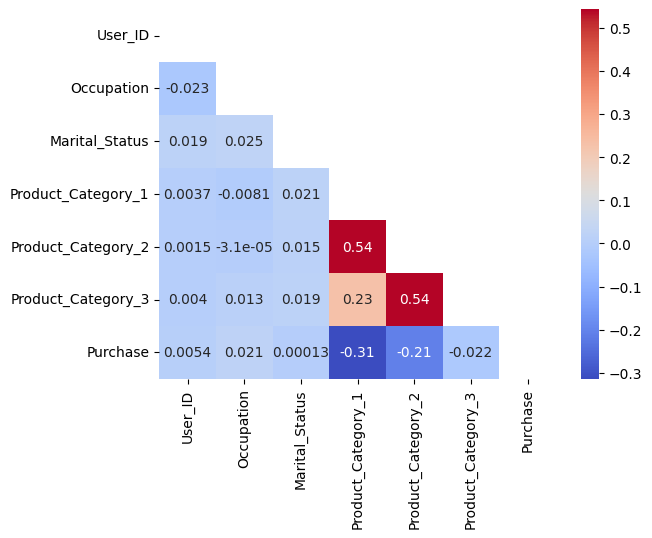

In [7]:
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
sns.heatmap(data.corr(), mask=mask, annot=True, cmap='coolwarm')

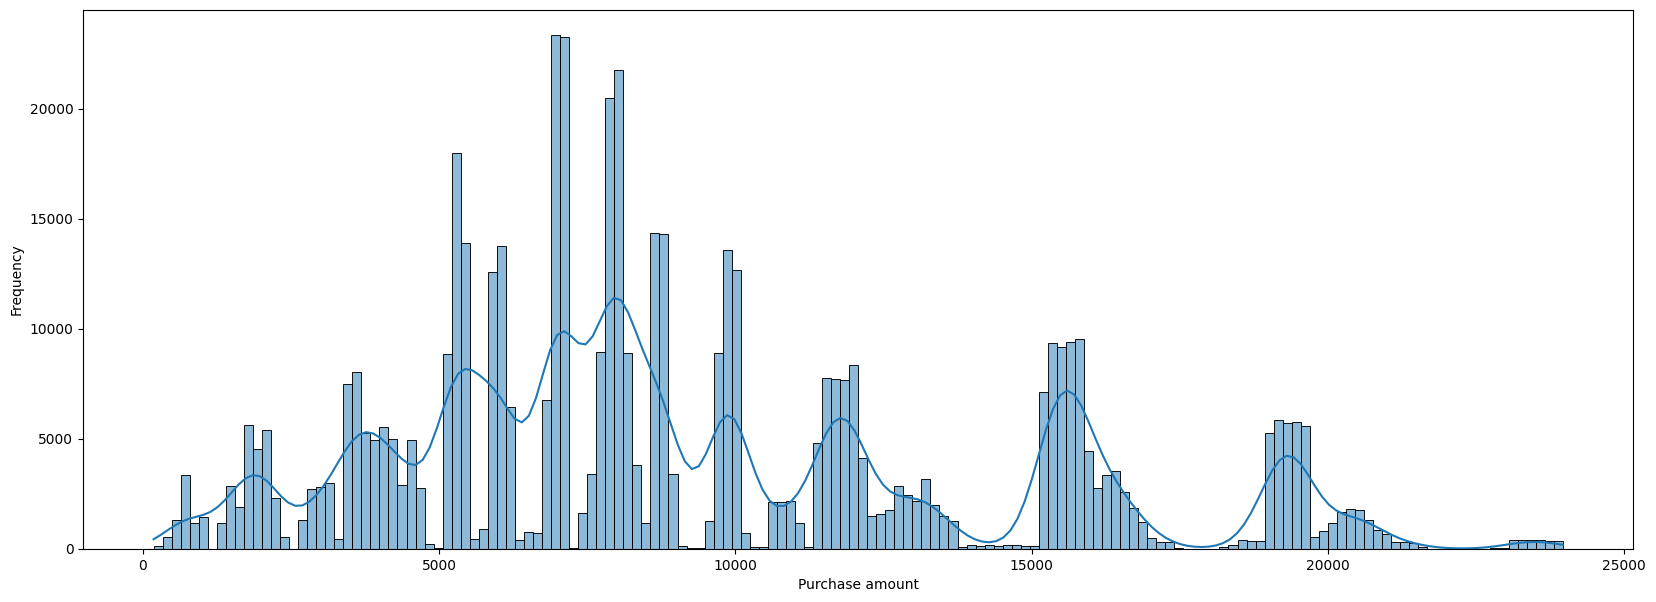

In [8]:
plt.rcParams['figure.figsize'] = (20, 7)
sns.histplot(data['Purchase'], kde=True)
plt.xlabel('Purchase amount')
plt.ylabel('Frequency')
plt.show()

# Handle missing values

In [9]:
simple_imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
simple_imputer = simple_imputer.fit(data.iloc[:, 9:11].values)
data.iloc[:, 9:11] = simple_imputer.transform(data.iloc[:, 9:11].values)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          537577 non-null  float64
 10  Product_Category_3          537577 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


# Feature engineering

In [10]:
object_features = data.select_dtypes(include=["object"]).nunique()
binary_features = object_features[object_features == 2].index
non_binary_features = object_features[object_features != 2].index

In [11]:
object_features

Product_ID                    3623
Gender                           2
Age                              7
City_Category                    3
Stay_In_Current_City_Years       5
dtype: int64

## Encoding features:

In [12]:
# We encode Gender using binary encoding
data["Gender"] = pd.get_dummies(data["Gender"], drop_first=True)

In [13]:
# Encode Age using one-hot encoding
age_encoder = OneHotEncoder(categories=[['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']])
age_encoded = age_encoder.fit_transform(data["Age"].values.reshape(-1, 1))
data[["Age_"+cat for cat in age_encoder.categories_[0]]] = pd.DataFrame(age_encoded.toarray(), index=data.index).astype(int)

In [14]:
# Encode City_Category using one-hot encoding
city_encoder = OneHotEncoder(categories=[['A', 'B', 'C']])
city_encoded = city_encoder.fit_transform(data["City_Category"].values.reshape(-1, 1))
data[["City_"+cat for cat in city_encoder.categories_[0]]] = pd.DataFrame(city_encoded.toarray(), index=data.index).astype(int)

In [15]:
# Encode Stay_In_Current_City_Years using label encoding
stay_df = pd.get_dummies(data['Stay_In_Current_City_Years'], prefix='Stay')
data = pd.concat([data, stay_df], axis=1)

In [16]:
# We drop unwanted columns:
data.drop(['User_ID', 'Product_ID', 'Age', 'City_Category', 'Stay_In_Current_City_Years'], axis=1, inplace=True)

# Feature Scaling

In [17]:
# Scaling 'Purchase' feature:
robust_scaler = RobustScaler()
data["Purchase"] = robust_scaler.fit_transform(data[["Purchase"]])

# scaler = StandardScaler()
# data['Purchase'] = scaler.fit_transform(data['Purchase'].values.reshape(-1, 1))

In [ ]:
sns.histplot(data['Purchase'], kde=True)
plt.xlabel('Purchase amount')
plt.ylabel('Frequency')
plt.show()

# Modeling

In [18]:
# We split the dataset into training and testing sets:
X = data.drop(['Purchase'], axis=1)
y = data['Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# We create the model:
lr = LinearRegression()
lr.fit(X_train, y_train)

# We our predictions:
y_pred_lr = lr.predict(X_test)

# Finally, we evaluate the model:
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print("Mean Squared Error:", mse_lr)
print("R^2 Score:", r2_lr)

Linear Regression:
Mean Squared Error: 0.8929942496945907
R^2 Score: 0.10677860837617603


In [19]:
df_predict = pd.DataFrame({'Actual ':y_test, 'Predicted ': y_pred_lr})
df_predict.head(10)

,Actual,Predicted
287383,-0.256144,0.541016
130087,2.000222,0.227295
104368,-0.645021,-0.240723
370791,-0.241690,-0.287109
121991,-0.132073,-0.150146
225339,-0.496055,-0.035156
243345,-0.809847,0.016602
130823,0.480251,0.388184
427396,1.462781,-0.882324
363068,-0.953191,-0.522949


In [20]:
# Create Ridge regression model with default parameters
ridge_reg = Ridge(alpha=0.1)

# Fit the model on the training data
ridge_reg.fit(X_train, y_train)

# Predict purchase amounts for the test set
y_pred_ridge = ridge_reg.predict(X_test)

# Calculate the model's R-squared score on the test set
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print("Ridge Model:")
print("Mean Squared Error:", mse_ridge)
print("R-squared:", r2_ridge)

Ridge Model:
Mean Squared Error: 0.8929770933614128
R-squared: 0.10679576907323729


In [21]:
# Create Ridge regression model with cross-validation to select alpha
ridge_cv = RidgeCV(alphas=[0.001, 0.1, 1.0, 10.0])

# Fit the model on the training data
ridge_cv.fit(X_train, y_train)

# Predict purchase amounts for the test set
y_pred_ridgecv = ridge_cv.predict(X_test)

# Calculate the model's R-squared score on the test set
r2_ridge_cv = ridge_cv.score(X_test, y_test)

# Get the best value of alpha selected by cross-validation
alpha = ridge_cv.alpha_

# Calculate and print the MSE
mse_ridge_cv = mean_squared_error(y_test, y_pred_ridgecv)

# Print the R-squared score and best alpha value
print("Ridge CV Model:")
print("Mean Squared Error:", mse_ridge_cv)
print("R-squared score:", r2_ridge_cv)
print("Best alpha:", alpha)

Ridge CV Model:
Mean Squared Error: 0.8929771138368654
R-squared score: 0.10679574859257657
Best alpha: 10.0


In [22]:
# Train the model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

# Make predictions on the test set
y_pred = elastic_net.predict(X_test)

# Evaluate the model
mse_elastic = mean_squared_error(y_test, y_pred)
r2_elastic = r2_score(y_test, y_pred)

print("ElasticNet Model:")
print('Mean Squared Error:', mse_elastic)
print('R-squared:', r2_elastic)

ElasticNet Model:
Mean Squared Error: 0.9005538383565348
R-squared: 0.09921709685800606
